<a href="https://colab.research.google.com/github/prof-Thiago-Nunes/Projetos-data-science-/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction para uma empresa de Telecomunicações
*by Professor: Thiago Nunes*  

---

## 1. Introdução

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://img.freepik.com/premium-vector/churn-rate-marketing-metric-illustration_614220-84.jpg?w=740" width="60%"></p>

Churn rate é um daqueles indicadores muito importantes acompanhar em um negócio. O churn rate, ou taxa de rotatividade em tradução para o português, representa a porcentagem de assinantes que pedem o cancelamento de um serviço em um período específico. Este cancelamento pode acontecer de forma voluntária ou involuntária.

*Por que acompanhar o churn rate é tão importante para um negócio?*

Essa taxa mostra quais são os assinantes que estão deixando de ser clientes, uma empresa precisa adquirir mais novos clientes em um determinado período de tempo do que aqueles que perde para continuar crescendo.

O cálculo da taxa de churn é simples: basta **dividir o número de cancelamentos no período em questão pelo número total de clientes ativos, e então multiplicar o resultado por 100**. Embora não haja consenso sobre qual é a média ideal, já que há variações de negócio para negócio, uma coisa é fato: quanto mais baixa a taxa, melhor.

**O que é churn involuntário?**
Nem todo abandono de pagamento de uma assinatura é um cancelamento desejado pelo seu cliente. Esta desistência do cliente faz parte, e muitas vezes é difícil de ser revertida.

Mas e aqueles cliente satisfeitos que têm sua assinatura suspensa por outros motivos sem que eles percebam? Este é o chamado churn involuntário, que geralmente acontece devido a problemas na etapa de pagamento.

Principais motivos de churn involuntário

**Cartão expirado ou cancelado**: ao longo do tempo, as informações do cliente e do cartão mudam. Para garantir a continuidade dos pagamentos, é preciso contar com uma equipe de atendimento reforçada capaz de manter atualizada a base de dados ou com ferramentas que renovem as informações automaticamente. É o caso da funcionalidade Account Updater, da Adyen, que realiza a atualização automática de cartões.

**Falha técnica**: o fluxo de aprovação de pagamentos é complexo e, muitas vezes dividido entre diferentes provedores em cada etapa. Nesse caso, a chance de erros por falha de comunicação é ainda maior. A boa notícia é que grande parte das transações podem ser recuperadas com novas tentativas de cobrança.

**Saldo insuficiente**: é um exemplo de falha não técnica, e acontece quando o cliente atinge o limite mensal do cartão ou não tem mais saldo disponível. Nessas situações, os dados do gateway de pagamentos são valiosos para traçar a estratégia de futuras tentativas, identificando em qual momento do mês as contas ainda têm saldo suficiente para que a cobrança seja realizada com sucesso.

**Esquecimento**: sempre que entram em um novo mercado, empresas buscam se adequar às formas de pagamento adotadas pelo público local. No Brasil, isso significa aderir ao boleto bancário. Para ajudar o cliente a se lembrar de realizar o pagamento, a dica é manter uma comunicação ativa com o cliente, oferecer descontos para quem paga com antecedência e incentivar a adesão ao cartão de crédito.

<p align=center>
<img src="https://img.freepik.com/premium-photo/customer-churn-rate-concept-client-attrition_556904-358.jpg?w=900" width="60%"></p>


*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

### 1.1 Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

### 1.2 Importando as bibliotecas

In [ ]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# importar os pacotes necessários
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

# Mostrar todas as colunas
pd.set_option('display.max_columns', None)


In [ ]:
#Configurando o estilo gráfico dos plots 
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = "11"
plt.rcParams["text.color"] = "#515151"
cinza_texto="#515151"
sns.set_style("white")

### 1.3 Importar os dados

In [ ]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)


## 2. Análise exploratória

Abordar tópicos/informações como:

* 2.1 Visualizar as 5 primeiras entradas;
* 2.2 Visualizar as 5 últimas entradas;
* 2.3 Visualizar o tamanho do dataset;
* 2.4 Verificar o tipo dos dados do Dataset;
* 2.5 Visualizar os valores ausentes
* 2.6 Visualizar os valores ausentes por coluna
* 2.7 Visualizar valores únicos por coluna
* 2.8 Construir um Dicionário de variáveis
* 2.9 tratar a coluna Total Charges e remover ID de cada coluna
* 2.10 Visualizar o resumo estatístico do dataframe;
* 2.11 Visualizar os outliers;
* 2.12 Verificar a fidelidade dos clientes ao longo dos meses;
* 2.13 Verificar o balanceamento dos dados;
* 2.13.1 Verificar o balanceamento da variável gênero;
* 2.13.2 Verificar balanceamento da variável Churn;

### 2.1 Visualizar as 5 primeiras entradas

In [ ]:
# visualizar as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.2 Visualizar as 5 últimas entradas

In [ ]:
# Visualizar as 5 últimas entradas

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### 2.3 Visualizar o tamanho do dataset

In [ ]:
print(f'O dataset possui: \t{df.shape[0]} linhas')
print(f'O dataset possui: \t{df.shape[1]} colunas')

O dataset possui: 	7043 linhas
O dataset possui: 	21 colunas


### 2.4 Verificando o tipo dos dados do Dataset

In [ ]:
# Verificando o tipo dos dados do Dataset 

for i in dict(df.dtypes).items():
  variavel = i[0]
  caracteres = '_'*(20 - len(variavel))
  tipo = i[1]
  print(f'A variável [{variavel}]{caracteres} é do tipo {tipo}')


A variável [customerID]__________ é do tipo object
A variável [gender]______________ é do tipo object
A variável [SeniorCitizen]_______ é do tipo int64
A variável [Partner]_____________ é do tipo object
A variável [Dependents]__________ é do tipo object
A variável [tenure]______________ é do tipo int64
A variável [PhoneService]________ é do tipo object
A variável [MultipleLines]_______ é do tipo object
A variável [InternetService]_____ é do tipo object
A variável [OnlineSecurity]______ é do tipo object
A variável [OnlineBackup]________ é do tipo object
A variável [DeviceProtection]____ é do tipo object
A variável [TechSupport]_________ é do tipo object
A variável [StreamingTV]_________ é do tipo object
A variável [StreamingMovies]_____ é do tipo object
A variável [Contract]____________ é do tipo object
A variável [PaperlessBilling]____ é do tipo object
A variável [PaymentMethod]_______ é do tipo object
A variável [MonthlyCharges]______ é do tipo float64
A variável [TotalCharges]_______

### 2.5 Visualizar os valores ausentes 

In [ ]:
print(f"Dados ausentes (total):\t{df.isnull().sum().values.sum()}\n")

Dados ausentes (total):	0



### 2.6 Visualizar os valores ausentes por coluna

In [ ]:
# Verificar os valores ausentes
for i in dict((df.isnull().sum() / df.shape[0])).items():
  variavel = i[0]
  caracteres = '_'*(20 - len(variavel))
  tipo = i[1]
  print(f'A variável [{variavel}]{caracteres} possui {tipo} % de valores ausentes.')

A variável [customerID]__________ possui 0.0 % de valores ausentes.
A variável [gender]______________ possui 0.0 % de valores ausentes.
A variável [SeniorCitizen]_______ possui 0.0 % de valores ausentes.
A variável [Partner]_____________ possui 0.0 % de valores ausentes.
A variável [Dependents]__________ possui 0.0 % de valores ausentes.
A variável [tenure]______________ possui 0.0 % de valores ausentes.
A variável [PhoneService]________ possui 0.0 % de valores ausentes.
A variável [MultipleLines]_______ possui 0.0 % de valores ausentes.
A variável [InternetService]_____ possui 0.0 % de valores ausentes.
A variável [OnlineSecurity]______ possui 0.0 % de valores ausentes.
A variável [OnlineBackup]________ possui 0.0 % de valores ausentes.
A variável [DeviceProtection]____ possui 0.0 % de valores ausentes.
A variável [TechSupport]_________ possui 0.0 % de valores ausentes.
A variável [StreamingTV]_________ possui 0.0 % de valores ausentes.
A variável [StreamingMovies]_____ possui 0.0 % d

### 2.7 Verificar os valores únicos por coluna

In [ ]:
# Verificar os valores únicos
for i in dict(df.nunique()).items():
  variavel = i[0]
  caracteres = '_'*(20 - len(variavel))

  tipo = i[1]
  print(f'A variável [{variavel}]{caracteres} possui {tipo} valores únicos.')

A variável [customerID]__________ possui 7043 valores únicos.
A variável [gender]______________ possui 2 valores únicos.
A variável [SeniorCitizen]_______ possui 2 valores únicos.
A variável [Partner]_____________ possui 2 valores únicos.
A variável [Dependents]__________ possui 2 valores únicos.
A variável [tenure]______________ possui 73 valores únicos.
A variável [PhoneService]________ possui 2 valores únicos.
A variável [MultipleLines]_______ possui 3 valores únicos.
A variável [InternetService]_____ possui 3 valores únicos.
A variável [OnlineSecurity]______ possui 3 valores únicos.
A variável [OnlineBackup]________ possui 3 valores únicos.
A variável [DeviceProtection]____ possui 3 valores únicos.
A variável [TechSupport]_________ possui 3 valores únicos.
A variável [StreamingTV]_________ possui 3 valores únicos.
A variável [StreamingMovies]_____ possui 3 valores únicos.
A variável [Contract]____________ possui 3 valores únicos.
A variável [PaperlessBilling]____ possui 2 valores ú

Lidando com variáveis categóricas, é importante ver os valores únicos. Isso permite identificar situações como labels diferentes querendo indicar a mesma coisa.

Vendo os valores impressos na célula abaixo, entendo que um cientista de dados pode queer considerar valores como `No`, `No phone service` e `No internet service` como sendo a mesma coisa.

Apesar de totalmente válida, não será essa a premissa adotada aqui. Irei considerar cada label individualmente.


Observações que merecem destaque nessa fase inicial de análise exploratória:

* A coluna `costumerID` não agrega nenhuma informação relevante, trata-se de um identificador único para cada cliente.
* A variável alvo está na coluna `Churn`, indicando a situação de churn.
* A coluna `TotalCharges` deveria ser um `float`, mas está como `string`.
    
* Várias features precisam ser codificadas para valores numéricos.
    * Há várias features binárias, incluindo nossa variável alvo, ou com múltiplos valores, cada um representando uma categoria.

### 2.8 Dicionário de variáveis 


* `customerID` = ID exclusivo para cada cliente;

* `gender` - Gênero dos clientes;
* `SeniorCitizen` - Caso o cliente seja idoso sim (1) ou não (0);
* `Partner` - Caso o cliente seja casado sim (1) ou não (0);
* `Dependents` - Caso o cliente possua filhos sim (1) ou não (0);
* `tenure` - Quantidade de meses que o cliente está na companhia telefônica (fidelidade do cliente);
* `PhoneService` - Caso o cliente possua serviços extras no celular sim (1) ou não (0);
* `MultipleLines` - Caso o cliente possua mais de uma linha telefônica sim (1) ou não (0);
* `InternetService` - Qual o provedor de internet do cliente (DSL, fibra ótica ou não possui);
* `OnlineSecurity` - Caso o cliente possua algum serviço de segurança cybernética sim (1) ou não (0);
* `OnlineBackup` - Caso o cliente possua um serviço de beckup de dados na nuvem (sim) ou (não ou não possui serviços de internet);
* `DeviceProtection` - caso o cliente possua serviço de proteção ao dispositivo (sim) ou (não ou não possui serviços de internet) ;
* `TechSupport` - Caso o cliente possua serviços de suporte técnico (sim) ou (não ou não possui serviços de internet);
* `StreamingTV` - Caso o cliente possua serviços de streaming de tv (sim) ou (não ou não possui serviços de internet)
* `StreamingMovies` - Caso o cliente possua serviços de streaming de filmes e séries (sim) ou (não ou não possui serviços de internet);
* `Contract` - O tipo de contrato do cliente (mensal, anual ou  de 2 anos);
* `PaperlessBilling` - Caso o cliente receba a fatura online sim (1) ou não (0);
* `PaymentMethod` - O método de pagamento do cliente (Cheque eletrônico, cheque enviado, transferência bancária (automática), cartão de crédito (automático));
* `MonthlyCharges` - O valor cobrado ao cliente mensalmente;
* `TotalCharges` - O valor total cobrado ao cliente;
* `Churn` - Se o cliente fará a rotatividade sim (1) ou não (0);

### 2.9 Tratando a coluna `Total Charges` e removendo o ID de cada coluna
Infelizmente existem valores ausentes na variáveis TotalCharges, alguns valores numéricos foram substituidos por strings, não podemos utilizar a função astype('float32') pois nos retornará um ValueError.

É necessário construir uma função para tratar as exceções, caso a linha aceite conversão será utilizado a converersão, caso contrário substituiremos por NaN logo após trocamos pela mediana.



In [ ]:
# converter coluna TotalCharges para float
#df["TotalCharges"].astype('float32')

In [ ]:
def converter_str_float(entrada):
    try:
        return float(entrada)
    except ValueError:
        return np.nan

# criar cópia do dataframe
df_clean = df.copy()

# remover coluna costumerID
df_clean.drop("customerID", axis=1, inplace=True)

# converter as strings de TotalCharges para float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

# verificar entradas ausentes
print(f"Dados ausentes em 'TotalCharges' (antes):\t{df_clean['TotalCharges'].isnull().sum()}")

# substituir os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

Dados ausentes em 'TotalCharges' (antes):	11


### 2.10 Visualizar o resumo estatístico do dataset

Apesar deste dataset ser composto majoritariamente por variáveis binárias ou categóricas, é possível visualizar abaixo, pelo método `describe`, que não há indícios da presença de outliers.

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### 2.11 Visualizar os Outliers

Analisando o boxplot para as colunas `MonthlyCharges` e `TotalCharges`, perceba como a distribuição dos valores reforça essa hipótese.

In [ ]:
# Cores padrão a ser usadas nos gráficos
cores = {
    'cinza' : '#9E9E9E',
    'azul' : '#003F5c',
    'texto' : '#515151'
}

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

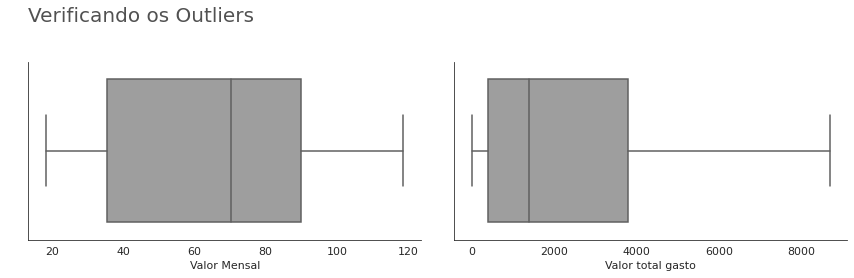

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Setando as cores padrão
sns.set_palette(cores.values())

# Criando o BOXPLOT
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0]) # Valor mensal
sns.boxplot(df_clean['TotalCharges'], ax=ax[1]) # Valor total gasto pelo cliente 

# Remover spines da direira e superior

# Valor mensal gasto
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

# Valor Total gasto
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


ax[0].set_title('Verificando os Outliers', loc='left', pad=40, fontdict={'fontsize':20}, color= '#515151');

# Limite do BOX PLOT
#plt.ylim((0, 200))

# Colocando as legendas

# Valor mensal gasto
#plt.xticks([0], ['Valor mensal'], fontsize = 20, color='#515151')
ax[0].set_xlabel('Valor Mensal')
ax[0].set_ylabel(' ')

# Valor total gasto
ax[1].set_xlabel('Valor total gasto')
ax[1].set_ylabel(' ')

# Mostrando (no lugar do SHOW)
plt.tight_layout();


A variável `tenure` está relacionada ao tempo que um cliente permance assinando determinado serviço. Em outras palavras, pode-se dizer que é um indicativo de fidelidade.

Assumimos a premissa que o tempo de análise é o mês, dada a variável de contrato que trabalha com contratos mensais e anuais.

### 2.12 Verificar a fidelidade dos clientes ao longo dos meses

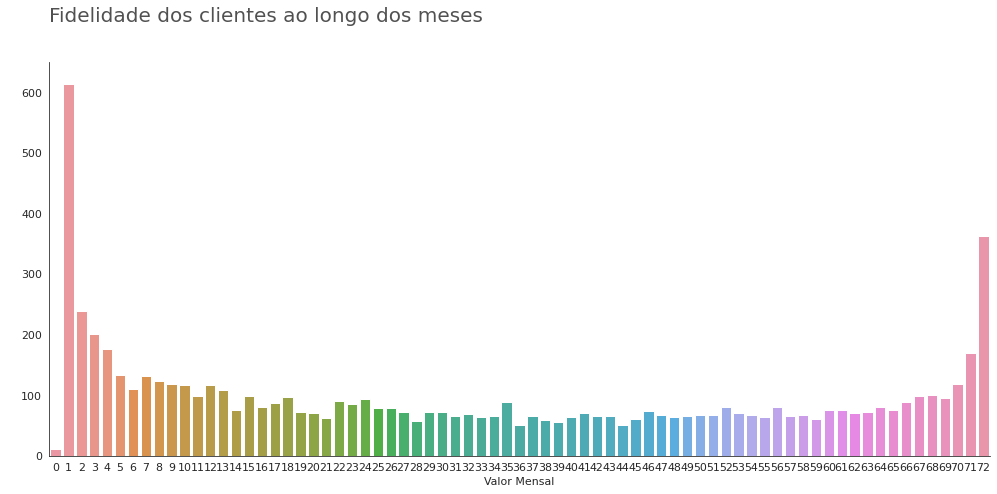

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

# Setando as cores padrão
sns.set_palette(cores.values())

# Criando o countplot
sns.countplot(df['tenure'])

# Remover spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Limite do countplot
plt.ylim((0, 650))

ax.set_title('Fidelidade dos clientes ao longo dos meses', loc='left', pad=40, fontdict={'fontsize':20}, color= '#515151');

# Fidelidade dos clientes ao longo dos meses
#plt.xticks([0], ['Valor mensal'], fontsize = 20, color='#515151')
ax.set_xlabel('Valor Mensal')
ax.set_ylabel(' ')

plt.tight_layout()

### 2.13 Verificar o balanceamento dos dados

#### 2.13.1  Verificar o balanceamento da variável gênero

In [ ]:
# Somar a quantidade de Mulheres e Homens que estão no plano
print(f"A quantidade de assinantes do gênero Feminino é: {(df['gender'] == 'Female').sum()}")
print(f"A quantidade de assinantes do gênero Masculino é: {(df['gender'] == 'Male').sum()}")

A quantidade de assinantes do gênero Feminino é: 3488
A quantidade de assinantes do gênero Masculino é: 3555


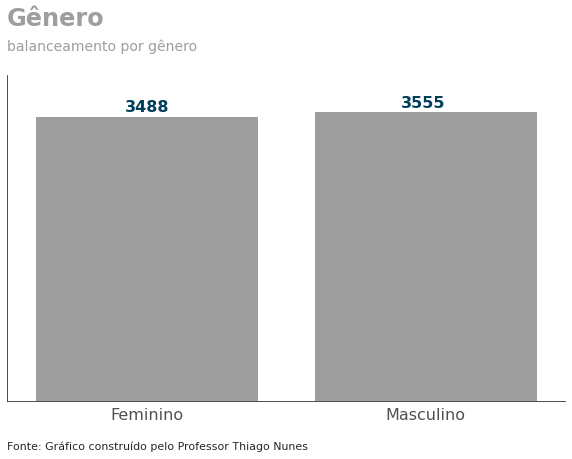

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

mycolor = ['#9E9E9E','#003F5c']

sns.countplot(df['gender'], color = '#9E9E9E')

# Removendo spines da direira e superior

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 4000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Feminino', 'Masculino'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 4600,'Gênero', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 4300,'balanceamento por gênero', fontsize=14, color= '#9E9E9E')

ax.text(-0.08, 3550,'3488',fontsize=16, fontweight='bold', color='#003F5c')
ax.text(0.910, 3600,'3555',fontsize=16, fontweight='semibold', color='#003F5c')



# Rodapé
ax.text(
    -0.50,
    -600,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Verificamos que o número de clientes de ambos os gêneros estão balanceados, possivelmente não será uma variável relevante.

##### Gênero em relação a variável Churn

In [ ]:
# Gênero em relação a variável Churn
print(df.groupby(['gender','Churn']).apply(len))


gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64


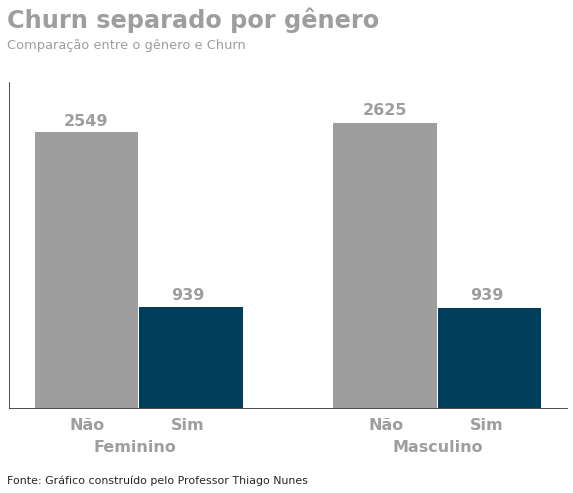

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

genero = ['Feminino', 'Masculino']
genero_fem_masc = [2549, 2625]
churn_fem_masc = [939, 930]
y_pos = np.arange(len(genero))

#Tamanho da barra
width = 0.35  

mycolor = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

rects1 = ax.bar(y_pos - width/2, genero_fem_masc, width)
rects2 = ax.bar(y_pos + width/2, churn_fem_masc, width)

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.set_xticklabels(labels=[], visible=False)
ax.set_xticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.44, 3500,'Churn separado por gênero', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.44, 3300,'Comparação entre o gênero e Churn', fontsize=13, color= '#9E9E9E')

# Legenda

# Feminino
ax.text(-0.25, 2600,'2549',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.11, 1000,'939',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.23, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text( 0.11, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.15, -400,'Feminino',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Masculino
ax.text(0.75, 2700,'2625',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.11, 1000,'939',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.11, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text( 0.77, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.85, -400,'Masculino',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Rodapé
ax.text(
    -0.44,
    -700,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Verificamos que a variável Churn comparada com a variável gênero não possui nenhuma tendência para algum gênero, na fase de Feature Selection levaremso em consideração essa informação.

#### 2.13.2 Verificar a quantidade de Idosos na operadora

In [ ]:
# Somar a quantidade de assinantes idosos no plano
print(f"A quantidade de assinantes idosos: {(df['SeniorCitizen'] == 1).sum()}")
print(f"A quantidade de assinantes não idosos: {(df['SeniorCitizen'] == 0).sum()}")

A quantidade de assinantes idosos: 1142
A quantidade de assinantes não idosos: 5901


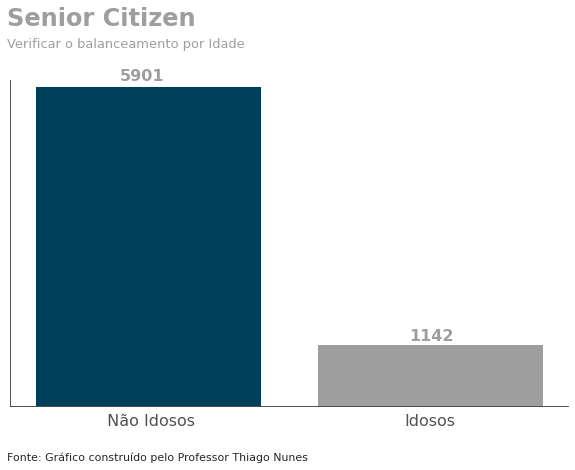

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_ido = ['Não', 'Sim']
tamanho_ido = [5901, 1142]
y_pos = np.arange(len(barras_ido))

mycolor = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_ido, tamanho_ido, color=mycolor);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 6000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_xticklabels([' Não Idosos', 'Idosos'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 7000,'Senior Citizen', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 6600,'Verificar o balanceamento por Idade', fontsize=13, color= '#9E9E9E')

ax.text(-0.1, 6000,'5901',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.925, 1200,'1142',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.50,
    -1000,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Podemos perceber que a grande parcela dos clientes desta empresa são Jovens/adultos, vamos analizar como está o churn na faixa etária dos idosos.

#####  Idade em relação a variável Churn

In [ ]:
# Idade em relação a variável Churn
print(df.groupby(['SeniorCitizen','Churn']).apply(len))

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
dtype: int64


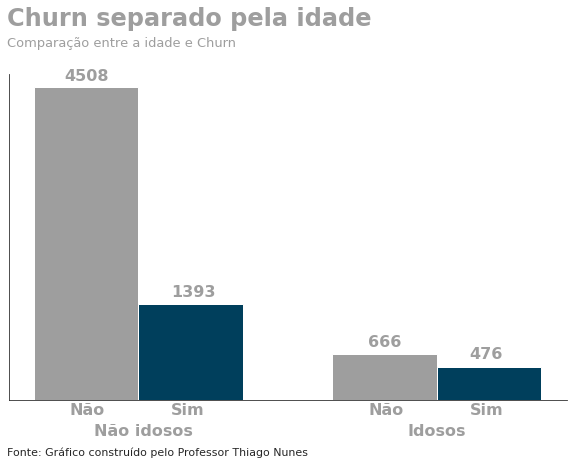

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

idade = ['Não idosos', 'Idosos']
idade_qtde = [4508, 666]
churn_idade = [1393, 476]
y_pos = np.arange(len(idade))

#Tamanho da barra
width = 0.35  

mycolor = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

rects1 = ax.bar(y_pos - width/2, idade_qtde, width)
rects2 = ax.bar(y_pos + width/2, churn_idade, width)

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 4700)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.set_xticklabels(labels=[], visible=False)
ax.set_xticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.44, 5400,'Churn separado pela idade', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.44, 5100,'Comparação entre a idade e Churn', fontsize=13, color= '#9E9E9E')

# Legenda

# Não idosos
ax.text(-0.25, 4608,'4508',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.11, 1493,'1393',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.23, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text( 0.11, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.15, -500,'Não idosos',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Idosos
ax.text(0.77, 776,'666',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.11, 600,'476',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.11, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text( 0.77, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.90, -500,'Idosos',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Rodapé
ax.text(
    -0.44,
    -800,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Verificamos que aproximadamente 42% dosclientes idosos abandonam o serviço da empresa, essa variável pode ser interessante para o nosso modelo.

#### 2.13.3 Verificar a quantidade de clientes casados

In [ ]:
# Somar a quantidade de assinantes casados no plano
print(f"A quantidade de assinantes casados: {(df['Partner'] == 'Yes').sum()}")
print(f"A quantidade de assinantes não casados: {(df['Partner'] == 'No').sum()}")

A quantidade de assinantes casados: 3402
A quantidade de assinantes não casados: 3641


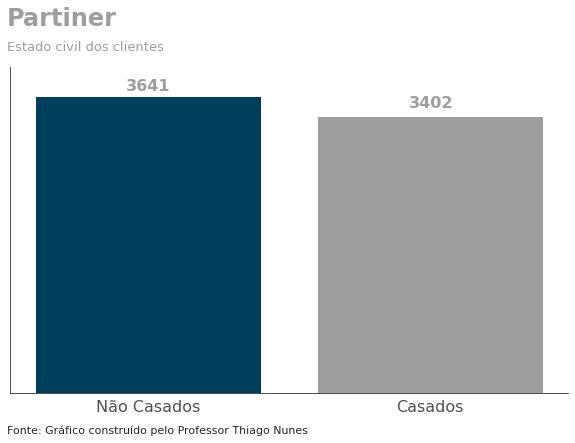

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_cas = ['Não Casado', 'Casado']
tamanho_cas = [3641, 3402]
y_pos = np.arange(len(barras_cas))

mycolor = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial';

ax.bar(barras_cas, tamanho_cas, color=mycolor);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 4000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Não Casados', 'Casados'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 4500,'Partiner', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 4200,'Estado civil dos clientes', fontsize=13, color= '#9E9E9E')

ax.text(-0.08, 3700,'3641',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.925, 3500,'3402',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.50,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Verificamos que existe um nivelamento nesta variável, provavelmente não será relevante para o modelo.

##### Casamento em relação a variável Churn

In [ ]:
# casamento em relação a variável Churn
print(df.groupby(['Partner','Churn']).apply(len))

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
dtype: int64


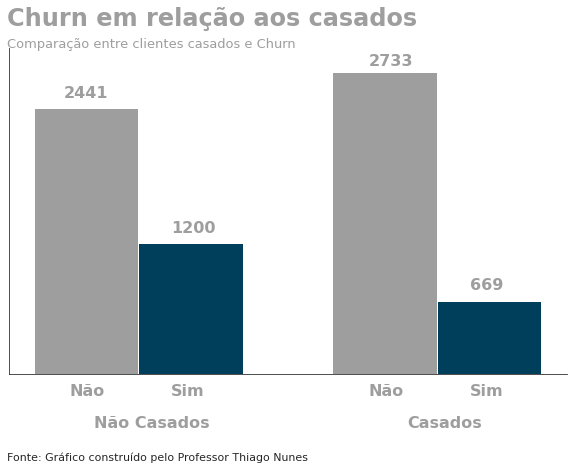

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

casado = ['Não casado', 'Casado']
casado_qtde = [2441, 2773]
churn_casado = [1200, 669]
y_pos = np.arange(len(casado))

#Tamanho da barra
width = 0.35  

mycolor = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

rects1 = ax.bar(y_pos - width/2, casado_qtde, width)
rects2 = ax.bar(y_pos + width/2, churn_casado, width)

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.set_xticklabels(labels=[], visible=False)
ax.set_xticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.44, 3200,'Churn em relação aos casados', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.44, 3000,'Comparação entre clientes casados e Churn', fontsize=13, color= '#9E9E9E')

# Legenda

# Não casados
ax.text(-0.25, 2541,'2441',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.11, 1300,'1200',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.23, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text( 0.11, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.15, -500,'Não Casados',fontsize=16, fontweight='semibold', color='#9E9E9E')

# casados
ax.text(0.77, 2833,'2733',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.11, 769,'669',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.11, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text( 0.77, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.90, -500,'Casados',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Rodapé
ax.text(
    -0.44,
    -800,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

A quantidade de cliente solteiros e casados é equilibrada, porém, os casados possuem uma leve tendência a não cometer o churn.

#### 2.13.4 Verificar a quantidade de clientes que possuem filhos

In [ ]:
# Somar a quantidade de assinantes com filhos
print(f"A quantidade de assinantes com filhos: {(df['Dependents'] == 'Yes').sum()}")
print(f"A quantidade de assinantes sem filhos: {(df['Dependents'] == 'No').sum()}")

A quantidade de assinantes com filhos: 2110
A quantidade de assinantes sem filhos: 4933


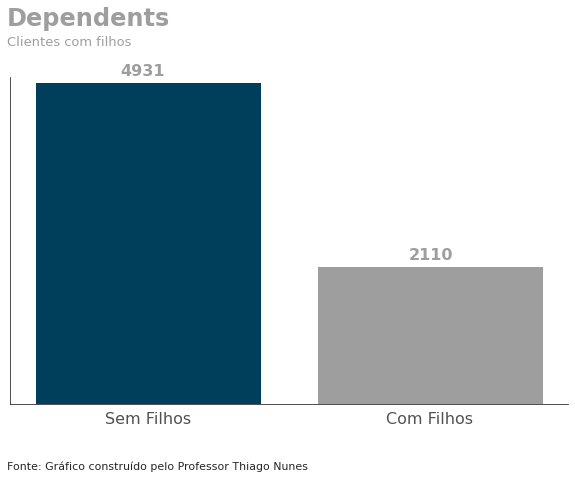

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_fil = [ 'Sem filhos', 'Com Filhos']
tamanho_fil = [4933, 2110]
y_pos = np.arange(len(barras_fil))

mycolor = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial';

ax.bar(barras_fil, tamanho_fil, color=mycolor);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 5000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Sem Filhos', 'Com Filhos'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 5800,'Dependents', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 5500,'Clientes com filhos', fontsize=13, color= '#9E9E9E')

ax.text(-0.1, 5031 ,'4931',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.925, 2210,'2110',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.50,
    -1000,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Agrande maioria dos clientes desta empresa não possuem filhos

##### Clientes com filhos em relação a variável churn

In [ ]:
# casamento em relação a variável Churn
print(df.groupby(['Dependents','Churn']).apply(len))

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
dtype: int64


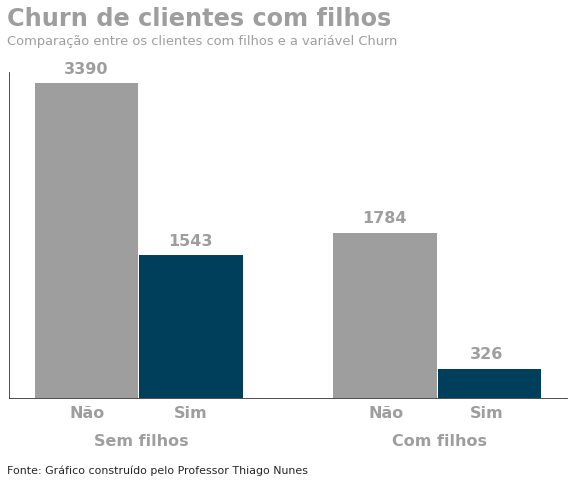

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

filhos = ['Sem filhos', 'Com filhos']
filhos_qtde = [3390, 1784]
churn_filhos = [1543, 326]
y_pos = np.arange(len(filhos))

#Tamanho da barra
width = 0.35  

mycolor = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

rects1 = ax.bar(y_pos - width/2, filhos_qtde, width)
rects2 = ax.bar(y_pos + width/2, churn_filhos, width)

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3500)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.set_xticklabels(labels=[], visible=False)
ax.set_xticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.44, 4000,'Churn de clientes com filhos', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.44, 3800,'Comparação entre os clientes com filhos e a variável Churn', fontsize=13, color= '#9E9E9E')

# Legenda

# Sem filhos
ax.text(-0.25, 3490,'3390',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.10, 1643,'1543',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.23, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text( 0.12, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.15, -500,'Sem filhos',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Com filhos
ax.text(0.75, 1884,'1784',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.11, 426,'326',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.11, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.77, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.85, -500,'Com filhos',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Rodapé
ax.text(
    -0.44,
    -800,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Percebemos que praticamente a metade dos clientes sem filhos tendem a deixar os serviços da empresa. Em relação aos clientes com filhos, essa taxa de evasão é pequena.

Provavelmente a resposta está no fator idade e constituição de família, clientes mais estabilizados e dependentes destes serviços.

#### 2.13.5 Verificar a quantidade de clientes que possuem serviços extras no plano

In [ ]:
# Somar a quantidade de assinantes com serviços extras
print(f"A quantidade de assinantes que possuem serviços extras no plano: {(df['PhoneService'] == 'Yes').sum()}")
print(f"A quantidade de assinantes possuem não serviços extras no plano: {(df['PhoneService'] == 'No').sum()}")

A quantidade de assinantes que possuem serviços extras no plano: 6361
A quantidade de assinantes possuem não serviços extras no plano: 682


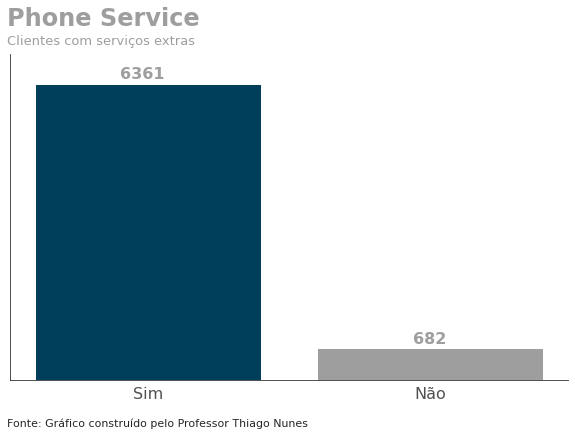

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_phon = ['Sim', 'Não']
tamanho_phon = [6361, 682]
y_pos2 = np.arange(len(barras_phon))

mycolor1 = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial';

ax.bar(barras_phon, tamanho_phon, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 7000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Sim', 'Não'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 7600,'Phone Service', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 7200,'Clientes com serviços extras', fontsize=13, color= '#9E9E9E')

ax.text(-0.1, 6461,'6361',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.940, 782,'682',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.50,
    -1000,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Podemos visualizar que a grande maioria possui algum tipo de serviço extra no celular.

#### 2.13.6 Verificar a quantidade de assinantes em cada modalidade de serviço de internet

In [ ]:
# Somar a quantidade de assinantes em cada modalidade de internet
print(f"A quantidade de assinantes de DSL: {(df['InternetService'] == 'DSL').sum()}")
print(f"A quantidade de assinantes possuem Fibra ótica: {(df['InternetService'] == 'Fiber optic').sum()}")
print(f"A quantidade de assinantes que não possuem serviços de internet : {(df['InternetService'] == 'No').sum()}")

A quantidade de assinantes de DSL: 2421
A quantidade de assinantes possuem Fibra ótica: 3096
A quantidade de assinantes que não possuem serviços de internet : 1526


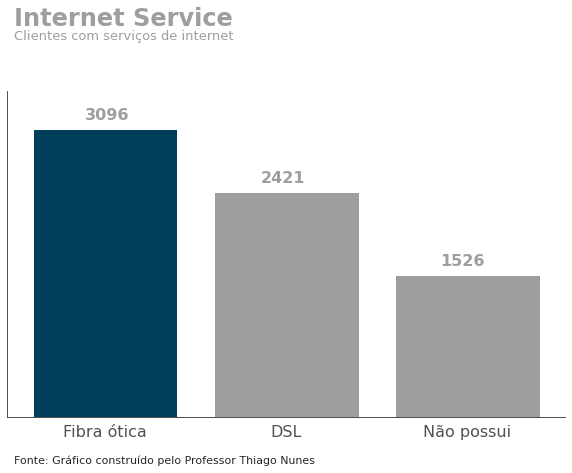

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_int = ['Fibra ótica', 'DSL', 'Não possui']
tamanho_int = [3096, 2421, 1526]
y_pos2 = np.arange(len(barras_int))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial';

ax.bar(barras_int, tamanho_int, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3500)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 4200,'Internet Service', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 4050,'Clientes com serviços de internet', fontsize=13, color= '#9E9E9E')

ax.text(-0.110, 3196,'3096',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.857, 2521,'2421',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(1.850, 1626,'1526',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.50,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Verificamos que a fibra ótica está na frente diante de outro serviço de internet (DSL).

O que é DSL?

O serviço DSL pode ser entregue simultaneamente com o serviço de telefonia cabeado na mesma linha telefônica. Isto é possível porque a DSL usa bandas de frequência maiores para dados. Nas instalações dos clientes, um filtro DSL em cada saída não DSL bloqueia qualquer interferência de alta frequência para permitir uso simultâneo de voz e serviços DSL.

#### 2.13.7 Quantidade de clientes que possuem multiplas linhas

In [ ]:
# Somar a quantidade de clientes que possuem multiplas linhas
print(f"A quantidade de assinantes que possuem multiplas linhas: {(df['MultipleLines'] == 'Yes').sum()}")
print(f"A quantidade de assinantes que não possuem multiplas linhas: {(df['MultipleLines'] == 'No').sum()}")
print(f"A quantidade de assinantes que não possuem serviços na linha : {(df['MultipleLines'] == 'No phone service').sum()}")

A quantidade de assinantes que possuem multiplas linhas: 2971
A quantidade de assinantes que não possuem multiplas linhas: 3390
A quantidade de assinantes que não possuem serviços na linha : 682


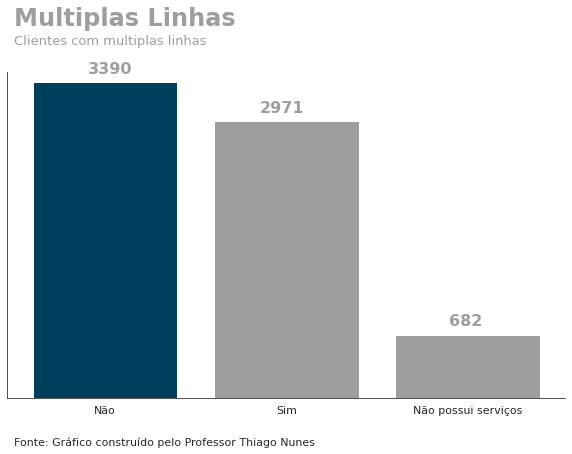

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_ml = ['Não', 'Sim', 'Não possui serviços']
tamanho_ml = [3390, 2971, 682]
y_pos = np.arange(len(barras_ml))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial';

ax.bar(barras_ml, tamanho_ml, color=mycolor1)

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3500)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 4000,'Multiplas Linhas', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 3800,'Clientes com multiplas linhas', fontsize=13, color= '#9E9E9E')

ax.text(-0.095, 3490,'3390',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.855, 3071,'2971',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(1.900, 782,'682',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.50,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Podemos visualizar que os dados estão balanceados entre os clientes que possuem multiplas linhas e clientes que não possuem, provavelmente não será uma variável relevante para o nosso modelo.

#### 2.13.8 Verificar os clientes que possuem o serviço de segurança Cibernética

In [ ]:
# Somar a quantidade de assinantes que possuem serviço de segurança cibernética
print(f"A quantidade de assinantes do serviço de segurança Cibernética: {(df['OnlineSecurity'] == 'Yes').sum()}")
print(f"A quantidade de assinantes que não possuem este serviço : {(df['OnlineSecurity'] == 'No').sum()}")

A quantidade de assinantes do serviço de segurança Cibernética: 2019
A quantidade de assinantes que não possuem este serviço : 3498


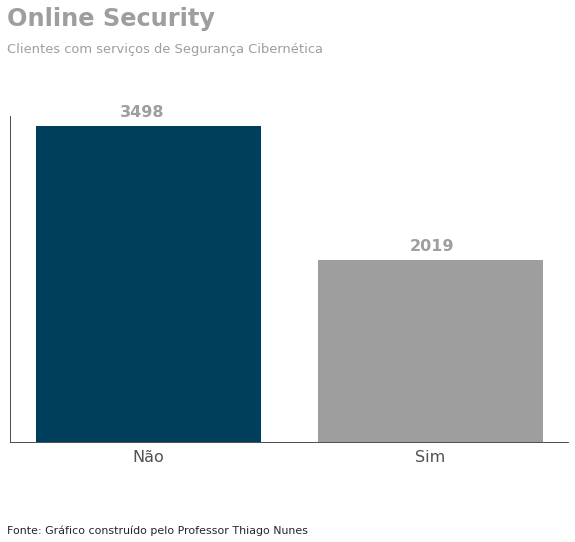

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_os = ['Não', 'Sim']
tamanho_os = [3498, 2019]
y_pos2 = np.arange(len(barras_os))

mycolor1 = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_os, tamanho_os, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3600)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['Não', 'Sim'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 4600,'Online Security', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 4300,'Clientes com serviços de Segurança Cibernética', fontsize=13, color= '#9E9E9E')

ax.text(-0.1, 3598,'3498',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.930, 2119,'2019',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.50,
    -1000,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Verificamos que uma boa parte dos clientes não possuem serviços de segurança online.

#### 2.13.9 Verificar a quantidade de clientes que possuem serviço de Backup na nuvem

In [ ]:
# Somar a quantidade de assinantes que possuem serviço de Backup na nuvem
print(f"A quantidade de assinantes do serviço de backup: {(df['OnlineBackup'] == 'Yes').sum()}")
print(f"A quantidade de assinantes que não possuem este serviço : {(df['OnlineBackup'] == 'No').sum()}")
print(f"A quantidade de assinantes que não possuem nenhum serviço de internet : {(df['OnlineBackup'] == 'No internet service').sum()}")

A quantidade de assinantes do serviço de backup: 2429
A quantidade de assinantes que não possuem este serviço : 3088
A quantidade de assinantes que não possuem nenhum serviço de internet : 1526


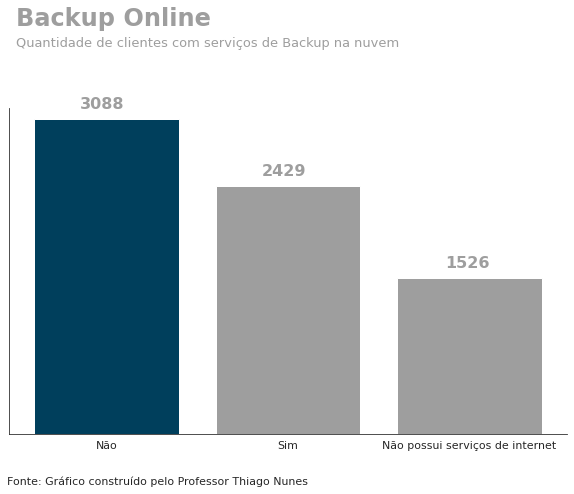

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_bko = ['Não', 'Sim', 'Não possui serviços de internet']
tamanho_bko = [3088, 2429, 1526]
y_pos = np.arange(len(barras_bko))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_bko, tamanho_bko, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3200)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 4000,'Backup Online', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 3800,'Quantidade de clientes com serviços de Backup na nuvem', fontsize=13, color= '#9E9E9E')

ax.text(-0.15, 3188,'3088',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.855, 2529,'2429',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(1.870, 1626,'1526',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.55,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Em relação ao serviço de backup online, temos um balanceamento dos clientes que possuem e não possuem este serviço, provavelmente não será uma variável relevante para o modelo.

#### 2.13.10 Device Protection

In [ ]:
# Somar a quantidade de assinantes que possuem serviço de Backup na nuvem
print(f"A quantidade de assinantes do serviço de proteção de celular : {(df['DeviceProtection'] == 'Yes').sum()}")
print(f"A quantidade de assinantes que não possuem este serviço : {(df['DeviceProtection'] == 'No').sum()}")
print(f"A quantidade de assinantes que não possuem nenhum serviço de internet : {(df['DeviceProtection'] == 'No internet service').sum()}")

A quantidade de assinantes do serviço de proteção de celular : 2422
A quantidade de assinantes que não possuem este serviço : 3095
A quantidade de assinantes que não possuem nenhum serviço de internet : 1526


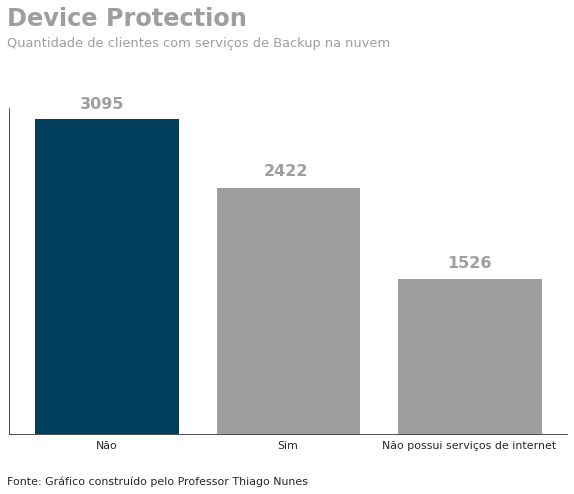

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_dp = ['Não', 'Sim', 'Não possui serviços de internet']
tamanho_dp = [3095, 2422, 1526]
y_pos = np.arange(len(barras_dp))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_dp, tamanho_dp, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3200)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.55, 4000,'Device Protection', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.55, 3800,'Quantidade de clientes com serviços de Backup na nuvem', fontsize=13, color= '#9E9E9E')

ax.text(-0.15, 3188,'3095',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.865, 2529,'2422',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(1.880, 1626,'1526',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.55,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Em relação ao serviço de proteção ao dispositivo, temos um balanceamento dos clientes que possuem e não possuem este serviço, provavelmente não será uma variável relevante para o modelo. 

#### 2.13.11 TechSupport

In [ ]:
# Somar a quantidade de assinantes que possuem serviço de suporte técnico no celular
print(f"A quantidade de assinantes do serviço de suporte técnico : {(df['TechSupport'] == 'Yes').sum()}")
print(f"A quantidade de assinantes que não possuem este serviço : {(df['TechSupport'] == 'No').sum()}")
print(f"A quantidade de assinantes que não possuem nenhum serviço de internet : {(df['TechSupport'] == 'No internet service').sum()}")

A quantidade de assinantes do serviço de suporte técnico : 2044
A quantidade de assinantes que não possuem este serviço : 3473
A quantidade de assinantes que não possuem nenhum serviço de internet : 1526


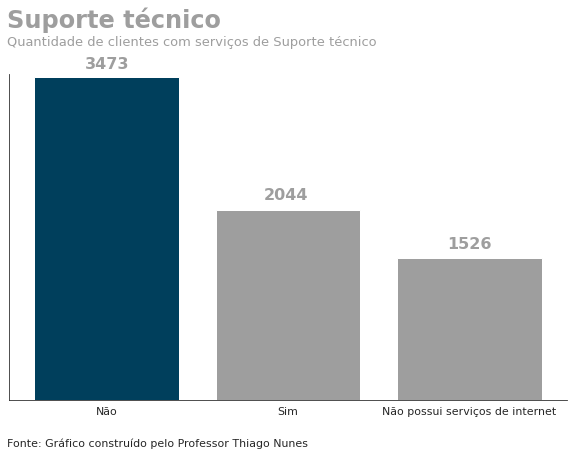

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_ts = ['Não', 'Sim', 'Não possui serviços de internet']
tamanho_ts = [3473, 2044, 1526]
y_pos = np.arange(len(barras_ts))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_ts, tamanho_ts, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3500)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.55, 4000,'Suporte técnico', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.55, 3800,'Quantidade de clientes com serviços de Suporte técnico', fontsize=13, color= '#9E9E9E')

ax.text(-0.12, 3560,'3473',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.865, 2150,'2044',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(1.880, 1620,'1526',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.55,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Uma boa parte dos clientes não contrata serviço de suporte técnico junto à operadora, o que é de se esperar, não é sempre que precisamos de suporte técnico.

#### 2.13.12 StreamingTV

In [ ]:
# Somar a quantidade de assinantes que possuem serviço de streaming tv
print(f"A quantidade de assinantes do serviço de streaming : {(df['StreamingTV'] == 'Yes').sum()}")
print(f"A quantidade de assinantes que não possuem este serviço : {(df['StreamingTV'] == 'No').sum()}")
print(f"A quantidade de assinantes que não possuem nenhum serviço de internet : {(df['StreamingTV'] == 'No internet service').sum()}")


A quantidade de assinantes do serviço de streaming : 2707
A quantidade de assinantes que não possuem este serviço : 2810
A quantidade de assinantes que não possuem nenhum serviço de internet : 1526


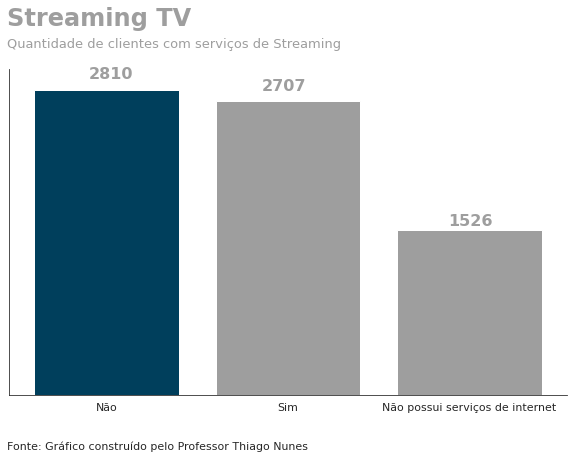

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_st = ['Não', 'Sim', 'Não possui serviços de internet']
tamanho_st = [2810, 2707, 1526]
y_pos = np.arange(len(barras_st))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_st, tamanho_st, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.55, 3400,'Streaming TV', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.55, 3200,'Quantidade de clientes com serviços de Streaming', fontsize=13, color= '#9E9E9E')

ax.text(-0.10, 2910,'2810',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.855, 2807,'2707',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(1.885, 1560,'1526',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.55,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

#### 2.13.13 Streaming Movies

In [ ]:
# Somar a quantidade de assinantes que possuem serviço de streaming
print(f"A quantidade de assinantes do serviço de streaming de filmes : {(df['StreamingMovies'] == 'Yes').sum()}")
print(f"A quantidade de assinantes que não possuem este serviço : {(df['StreamingMovies'] == 'No').sum()}")
print(f"A quantidade de assinantes que não possuem nenhum serviço de internet : {(df['StreamingMovies'] == 'No internet service').sum()}")

A quantidade de assinantes do serviço de streaming de filmes : 2732
A quantidade de assinantes que não possuem este serviço : 2785
A quantidade de assinantes que não possuem nenhum serviço de internet : 1526


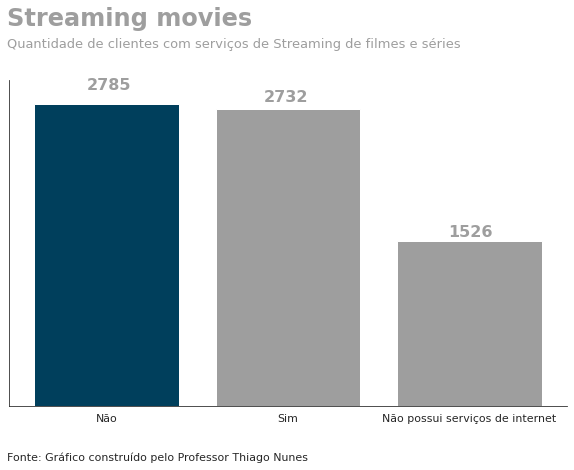

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_sm = ['Não', 'Sim', 'Não possui serviços de internet']
tamanho_sm = [2785, 2732, 1526]
y_pos = np.arange(len(barras_sm))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_sm, tamanho_sm, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 3000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.55, 3500,'Streaming movies', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.55, 3300,'Quantidade de clientes com serviços de Streaming de filmes e séries', fontsize=13, color= '#9E9E9E')

ax.text(-0.11, 2910,'2785',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.865, 2807,'2732',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(1.885, 1560,'1526',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.55,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

#### 2.13.14 Tipo de contrato do cliente

In [ ]:
# Somar a quantidade de assinantes por tipo de contrato
print(f"A quantidade de assinantes com contrato mensal: {(df['Contract'] == 'Month-to-month').sum()}")
print(f"A quantidade de assinantes com contrato anual: {(df['Contract'] == 'One year').sum()}")
print(f"A quantidade de assinantes com contrato de 2 anos: {(df['Contract'] == 'Two year').sum()}")

A quantidade de assinantes com contrato mensal: 3875
A quantidade de assinantes com contrato anual: 1473
A quantidade de assinantes com contrato de 2 anos: 1695


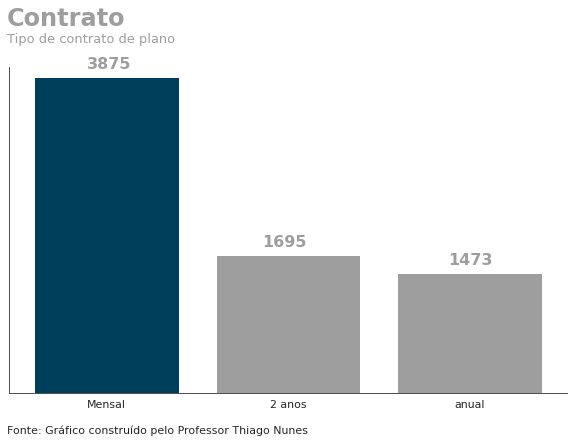

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_co = ['Mensal', '2 anos', 'anual']
tamanho_co = [3875, 1695, 1473]
y_pos = np.arange(len(barras_co))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_co, tamanho_co, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 4000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.55, 4500,'Contrato', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.55, 4300,'Tipo de contrato de plano', fontsize=13, color= '#9E9E9E')

ax.text(-0.11, 3975,'3875',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.855, 1795,'1695',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(1.885, 1573,'1473',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.55,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Percebemos que os contratos mensais estão com a maior quantidade de assinaturas e provavelmente o maior índice de Churn, como dito na introdução, as empresas sofrem com o Churn involuntário causado, na maioria das vezes, por esquecimento do cliente ou o bloqueio do cartão de crédito.



In [ ]:
# casamento em relação a variável Churn
print(df.groupby(['Contract','Churn']).apply(len))

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
dtype: int64


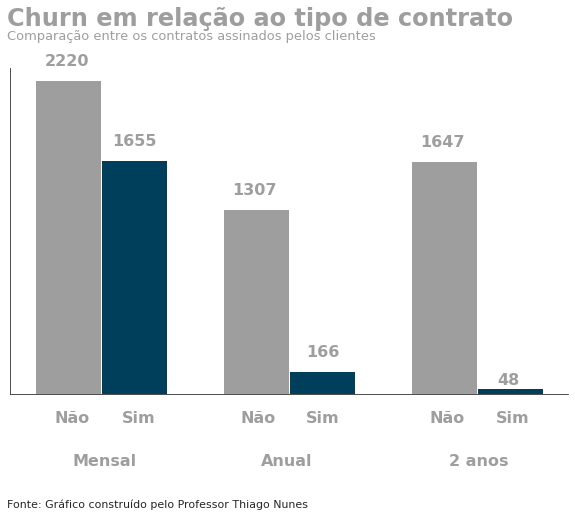

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

contrato = ['Mensal', 'Anual', '2 anos']
contrato_qtde = [2220, 1307, 1647]
churn_contrato = [1655, 166, 48]
y_pos = np.arange(len(contrato))

#Tamanho da barra
width = 0.35  

mycolor = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

rects1 = ax.bar(y_pos - width/2, contrato_qtde, width)
rects2 = ax.bar(y_pos + width/2, churn_contrato, width)

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 2300)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.set_xticklabels(labels=[], visible=False)
ax.set_xticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 2600,'Churn em relação ao tipo de contrato', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 2500,'Comparação entre os contratos assinados pelos clientes', fontsize=13, color= '#9E9E9E')

# Legenda

# Mensal
ax.text(-0.30, 2320,'2220',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.06, 1755,'1655',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.25, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text( 0.11, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.15, -500,'Mensal',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Anual
ax.text(0.70, 1407,'1307',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.09, 266,'166',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.09, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.74, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.85, -500,'Anual',fontsize=16, fontweight='semibold', color='#9E9E9E')


# 2 anos
ax.text(1.70, 1747,'1647',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(2.11, 70,'48',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(2.1, -200,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.75, -200,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.85, -500,'2 anos',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Rodapé
ax.text(
    -0.50,
    -800,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Verificamos que o churn está atrelado ao tipo de contrato, como vimos anteriormente o cliente que possui contrato mensal além de poder sair a qualquer momento da empresa, está sujeito a outros fatores que podem gerar o churn como: esquecer de pagar o boleto, limite no cartão de crédito e etc.

Aos clientes que possuem contrato anual ou de dois anos, geram uma segurança maior a empresa, pois, a quebra de contrato pode gerar uma multa para o cliente.

Provavelmente os clientes que possuem contratos mais longos possuem uma necessidade maior para com estes serviços. Adultos com filhos (com família constituída) tendem a ter estes serviços para a casa (Internet, Streaming, Linhas múltiplas e etc), logo os contratos por um período de tempo maior e com vários pacotes inclusos são mais práticos, levando o cliente a não praticar a mudança de operadora.

#### 2.13.15 PaperlessBilling

In [ ]:
# Somar a quantidade de assinantes que recebem por email a fatura
print(f"A quantidade de assinantes com fatura digital: {(df['PaperlessBilling'] == 'Yes').sum()}")
print(f"A quantidade de assinantes com fatura por correio: {(df['PaperlessBilling'] == 'No').sum()}")

A quantidade de assinantes com fatura digital: 4171
A quantidade de assinantes com fatura por correio: 2872


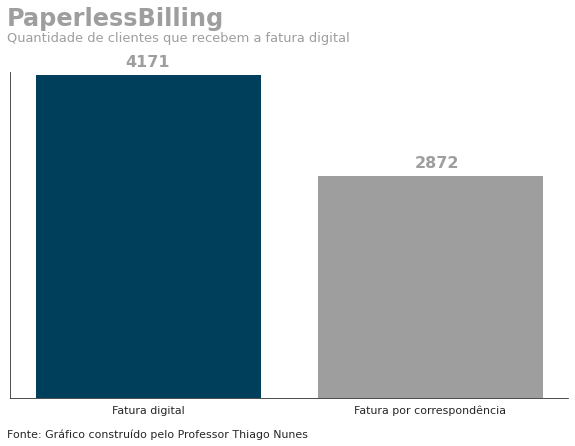

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_plb = ['Fatura digital', 'Fatura por correspondência']
tamanho_plb = [4171, 2872]
y_pos = np.arange(len(barras_plb))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_plb, tamanho_plb, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 4200)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 4800,'PaperlessBilling', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 4600,'Quantidade de clientes que recebem a fatura digital', fontsize=13, color= '#9E9E9E')

ax.text(-0.08, 4271,'4171',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.945, 2972,'2872',fontsize=16, fontweight='semibold', color='#9E9E9E')



# Rodapé
ax.text(
    -0.50,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

#### 2.13.16 Payment Method

In [ ]:
# Somar a quantidade de assinantes que recebem por email a fatura
print(f"A quantidade de assinantes que pagam com cheque eletrônico: {(df['PaymentMethod'] == 'Electronic check').sum()}")
print(f"A quantidade de assinantes que pagam por boleto físico: {(df['PaymentMethod'] == 'Mailed check').sum()}")
print(f"A quantidade de assinantes que pagam por transferência bancária: {(df['PaymentMethod'] == 'Bank transfer (automatic)').sum()}")
print(f"A quantidade de assinantes que pagam por cartão de crédito automático: {(df['PaymentMethod'] == 'Credit card (automatic)').sum()}")

A quantidade de assinantes que pagam com cheque eletrônico: 2365
A quantidade de assinantes que pagam por boleto físico: 1612
A quantidade de assinantes que pagam por transferência bancária: 1544
A quantidade de assinantes que pagam por cartão de crédito automático: 1522


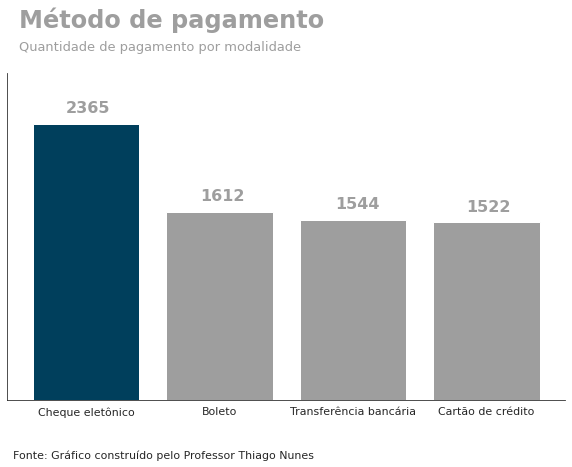

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_pm = ['Cheque eletônico', 'Boleto', 'Transferência bancária', 'Cartão de crédito']
tamanho_pm = [2365, 1612, 1544, 1522]
y_pos = np.arange(len(barras_pm))

mycolor1 = ['#003F5c', '#9E9E9E', '#9E9E9E', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_pm, tamanho_pm, color=mycolor1);

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 2800)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
#ax.set_xticklabels(['Fibra ótica', 'DSL', 'Não possui'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 3200,'Método de pagamento', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 3000,'Quantidade de pagamento por modalidade', fontsize=13, color= '#9E9E9E')

ax.text(-0.15, 2465,'2365',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.855, 1712,'1612',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(1.865, 1644,'1544',fontsize=16, fontweight='semibold', color='#9E9E9E')
ax.text(2.850, 1622,'1522',fontsize=16, fontweight='semibold', color='#9E9E9E')


# Rodapé
ax.text(
    -0.55,
    -500,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

In [ ]:
# casamento em relação a variável Churn
print(df.groupby(['PaymentMethod','Churn']).apply(len))

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
dtype: int64


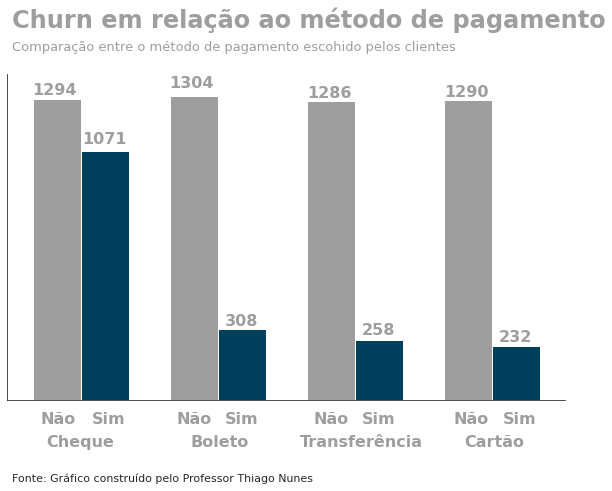

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

pagamento = ['Cheque eletrônico', 'Boleto', 'transferência bancária', 'cartão de crédito']
pagamento_qtde = [1294, 1304, 1286, 1290]
churn_pagamento = [1071, 308, 258, 232]
y_pos = np.arange(len(pagamento))

#Tamanho da barra
width = 0.35  

mycolor = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

rects1 = ax.bar(y_pos - width/2, pagamento_qtde, width)
rects2 = ax.bar(y_pos + width/2, churn_pagamento, width)

# Removendo spines da direira e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 1400)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.set_xticklabels(labels=[], visible=False)
ax.set_xticks(ticks=[])

ax.get_yaxis().set_visible(False)
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 1600,'Churn em relação ao método de pagamento', fontsize=24, color= '#9E9E9E', fontweight='bold')
ax.text(-0.50, 1500,'Comparação entre o método de pagamento escohido pelos clientes', fontsize=13, color= '#9E9E9E')

# Legenda

# Cheque
ax.text(-0.35, 1310,'1294',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.01, 1100,'1071',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.29, -100,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text( 0.08, -100,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(-0.25, -200,'Cheque',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Boleto
ax.text(0.65, 1340,'1304',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.05, 320,'308',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.05, -100,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.70, -100,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.80, -200,'Boleto',fontsize=16, fontweight='semibold', color='#9E9E9E')


# Transferência bancária
ax.text(1.65, 1300,'1286',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(2.05, 280,'258',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(2.05, -100,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.70, -100,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(1.60, -200,'Transferência',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Cartão de crédito
ax.text(2.65, 1304,'1290',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(3.05, 252,'232',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(2.72, -100,'Não',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(3.08, -100,'Sim',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(2.80, -200,'Cartão',fontsize=16, fontweight='semibold', color='#9E9E9E')

# Rodapé
ax.text(
    -0.50,
    -350,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Verificamos que a grande maioria dos clientes que se desligam da empresa pagam suas faturas no cheque eletrônico.

O cheque eletrônico (também conhecida como e-check) serve ao mesmo propósito de uma verificação de papel tradicional, mas funciona digitalmente. Quando alguém usa um cheque eletrônico, o valor que escreveu o cheque será retirado de sua conta corrente (do pagador) e será transferido via rede ACH para ser depositado na conta corrente do beneficiário, este serviço é mais tecnológico que o cheque tradicional, porém ainda é um meio de pagamento manual, ou seja, com a correria do cotidiano das pessoas é provável que o cliente esqueça de pagar um determinado serviço.

Ao contrário das outras formas de pagamento, todas elas são feitas de forma automática, o pagamento debita de forma automática da conta do cliente, evitando a evasão por esquecimento.



#### 2.13.2 Verificando balanceamento da variável `Churn`

In [ ]:
# Somar a quantidade de churn (sim) ou (não)
print(f"A quantidade de pessoas que não saíram é: {(df['Churn'] == 'No').sum()}")
print(f"A quantidade de pessoas que saíram: {(df['Churn'] == 'Yes').sum()}")

A quantidade de pessoas que não saíram é: 5174
A quantidade de pessoas que saíram: 1869


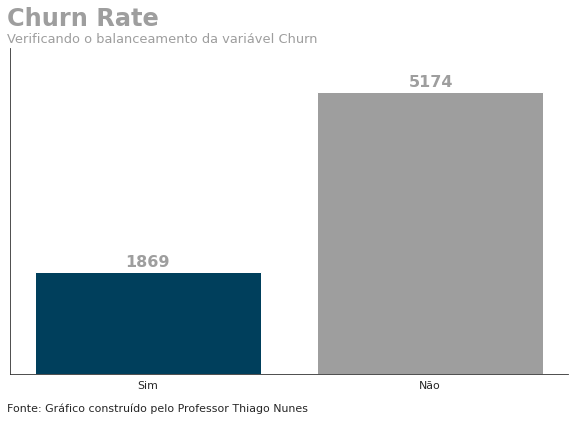

In [ ]:
# Definindo a figura
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

barras_chur = ['Sim', 'Não']
tamanho_chur = [1869, 5174]
y_pos = np.arange(len(barras_chur))

mycolor3 = ['#003F5c', '#9E9E9E']

# Configurando a fonte
plt.rcParams['font.family'] = 'Arial'

ax.bar(barras_chur, tamanho_chur, color=mycolor3)

# Removendo spines da direira e superior

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mudando range do eixo y
ax.set_ylim(0, 6000)

# Removendo yticks e yticklabels
ax.set_yticklabels(labels=[], visible=False)
ax.set_yticks(ticks=[])

ax.get_yaxis().set_visible(False)
# ax.set_xticklabels(['Não', 'Sim'], fontsize=16, color='#515151')
ax.set_ylabel(' ')
ax.set_xlabel(' ')

# title
ax.text(-0.50, 6400,'Churn Rate', fontsize=24, color='#9E9E9E', fontweight='bold')
ax.text(-0.50, 6100,'Verificando o balanceamento da variável Churn', fontsize=13, color='#9E9E9E')

ax.text(-0.08, 1969,'1869',fontsize=16, fontweight='bold', color='#9E9E9E')
ax.text(0.925, 5274,'5174',fontsize=16, fontweight='semibold', color= '#9E9E9E')



# Rodapé
ax.text(
    -0.50,
    -700,
    "Fonte: Gráfico construído pelo Professor Thiago Nunes"
)

# Exibindo o gráfico
plt.show()

Os dados da coluna alvo estão desbalanceados, na próxima etapa faremos o balanceamento dos dados para melhorar o modelo de machine Learning.

## 3. Preparação dos dados



Nesta etapa será realizado os seguintes tópicos:
* 3.1 Pré-processamento dos dados
* 3.2 Criar uma cópia do dataframe
* 3.3 Criar um Label Encoding para as variáveis Binárias
* 3.4 Criar um Encoding para colunas categóricas com múltiplas classes
* 3.5 Visualizar as 5 primeiras colunas
* 3.6 Visualizar as 5 últimas colunas

### 3.1 Pré-processamento dos dados

Separando as variáveis categóricas das numéricas do dataset

In [ ]:
#Separando as variáveis binárias do dataset
variavel_binaria = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()

# Agrupando as variáveis numéricas
variavel_numerica = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in variavel_binaria]

# Agrupando as variáveis categóricas
variavel_categorica = [col for col in df_clean.columns.tolist() if col not in variavel_binaria + variavel_numerica]


### 3.2 Criando uma cópia do dataframe

In [ ]:
# Criando uma cópia do dataframe
df_copia = df_clean.copy()

### 3.3 Label Encoding para as variáveis binárias
Um conjunto de dados pode conter vários tipos de valores, às vezes consiste em valores categóricos. Então, para usar esses valores categóricos para programação eficientemente criamos variáveis falsas. Uma variável fictícia é uma variável binária que indica se uma variável categórica separada assume um valor específico.

transformaremos os dados em binários, 0 ou 1

In [ ]:
# Label Encoding para as variáveis binárias
label_encoding = LabelEncoder()
for i in variavel_binaria:
  df_copia[i] = label_encoding.fit_transform(df_copia[i])


### 3.4 Label Encoding para as variáveis com mais de 2 classes


In [ ]:
df_copia = pd.get_dummies(df_copia, columns = variavel_categorica)

### 3.5 Visualizando as 5 primeiras linhas

In [ ]:
# 3.5 Visualizando as 5 primeiras linhas
df_copia.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


### 3.6 Visualizando as 5 últimas linhas

In [ ]:
# 3.5 Visualizando as 5 últimas linhas
df_copia.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
7042,1,0,0,0,66,1,1,105.65,6844.50,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0


### 3.7 Matriz de correlação 

Com essa matriz verificamos as variáveis mais importantes e as com menos relevância.

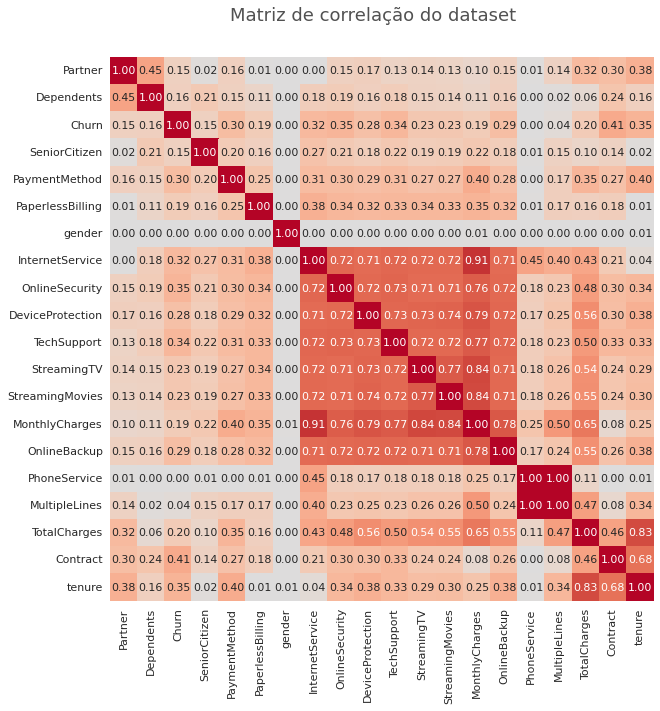

In [ ]:
#Instalando a biblioteca e importando o módulo 
try:
    from dython.nominal import associations
except ImportError as e:
    %pip install dython --quiet
    from dython.nominal import associations

#Criando a figura
fig, ax = plt.subplots(figsize=(10,10))
st = fig.suptitle("Matriz de correlação do dataset", 
                  fontsize="18", 
                  color=cinza_texto,
                  y=.95)

#Plotando
corr = associations(df_clean, 
                    ax=ax, 
                    clustering=True, 
                    cmap='coolwarm', 
                    cbar=False)

#Exibindo
plt.show()

Como era esperado, a variável gênero não possui relevância em nosso modelo.

## 4. Constuindo o modelo de Machine Learning

Com o processamento realizado na etapa anterior, os dados já podem ser usados nos modelos de machine learning.

Para podermos comparar o desempenho e melhora do modelo, criaremos um baseline simples. Não será feito nenhum ajuste nos hiperparâmetros e nem será pensado ainda em balanceamento de dados, feature engineering ou feature selection (entre outros).

No entanto, desde já é importante separar os dados que serão utilizados como treino e como teste. Os dados de teste só irão ser usados na última etapa do projeto, para termos uma avaliação mais real.

Nesta etapa será realizado os seguintes tópicos:

* 4.1 Separar a variável alvo
* 4.2 Dividir os dados em treino e teste
* 4.3 Criar um cross-validation
* 4.3.1 Criando a baseline e vesualizando o desempenho
* 4.5 Feature Scaling
* 4.5.1 Pradronizando os dados
* 4.6 Balanceamento dos dados
* 4.7 Aplicando a validação cruzada
* 4.8 Otimizando os hiperparâmetros
* 4.9 Verificando os resultados do modelo

### 4.1 Separar a variável alvo
Nesta etapa é necessário separar a variável alvo "Churn", essa é a variável que faremos a predição.

In [ ]:
# Separando a variável alvo

X = df_copia.drop('Churn', axis = 1)
y = df_copia['Churn']

### 4.2 Dividindo os dados em treino e teste

Para agrupar os dados de treino e teste, vamos dividir os dados, sendo 70% para treino e 30% para teste.

In [ ]:
# dividir os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 4.3 Criando um Cross-validation

Cross-Validation (CV) é uma técnica usada para avaliar um modelo de aprendizado de máquina e testar seu desempenho (ou precisão). Envolve reservar uma amostra específica de um conjunto de dados no qual o modelo não é treinado. Posteriormente, o modelo é testado nesta amostra para avaliá-lo.

A validação cruzada é usada para proteger um modelo de superequipar, especialmente se a quantidade de dados disponíveis for limitada. Também é conhecido como estimativa de rotação ou teste fora da amostra e é usado principalmente em configurações onde o alvo do modelo é a previsão.

obs:  Um modelo é considerado "superequipado" se modelar os dados de treinamento tão bem que afeta negativamente seu desempenho em novos dados.

Este procedimento de reamostragem também é usado para comparar diferentes modelos de aprendizado de máquina e determinar o quão bem eles funcionam para resolver um determinado problema. Em outras palavras, a validação cruzada é um método usado para avaliar a habilidade dos modelos de aprendizagem de máquina.

In [ ]:
def val_model(X, y, clf, quite=False):
    x = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall', cv=5)

    if quite == False:
        print(f"Recall: {scores.mean():.2f} (+/-) {scores.std():.2f}")
    
    return scores.mean()

### 4.3.1 Criando uma baseline e verificando o desempenho

In [ ]:
# criar baseline e verificar desempenho
rf = XGBClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.52 (+/-) 0.04


A baseline servirá como a nossa base para verificar se as otimizações e o balanceamento ajudará a melhorar o modelo.

Nesta baseline está sendo utilizado  recall, ou sensibilidade, é a capacidade do nosso modelo de identificar corretamente todos os casos positivos. Traduzindo para o nosso caso aqui: De todas os churns reais registradas no conjunto de dados, quantos deles foram detectadas pelo nosso modelo?

### 4.7 Feature Scaling
É um passo importante durante o pré-processamento de dados para padronizar os recursos independentes presentes no conjunto de dados. Padronizando, queremos dimensionar os recursos para trazê-los na mesma faixa. Existem várias técnicas para realizar o dimensionamento de recursos. Mas, primeiro, vamos entender por que é importante fazê-lo.

Em um cenário geral, cada característica no conjunto de dados tem algumas unidades e magnitude. Suponha que tenhamos duas características : Idade e Salário. O modelo de machine learning dará alta importância a características que têm alta magnitude e baixa importância para características de baixa magnitude, independentemente da unidade dos valores, isso prejudica o nosso modelo de ML.

4.7.1 Padronizando os dados

Padronização é quando as features sofrem uma mudança de escala, e passa a ter as propriedades de uma distribuição normal com média $\mu = 0$ e desvio padrão $\sigma = 1$.

Na padronização, os z-scores são calculados da seguinte maneira:

\begin{align}
  z = \frac{x-\mu}{\sigma};\space \sigma = \sqrt{\frac{(x-\mu)^2}{n}}
\end{align}
<br>
<center><img src = "http://saylordotorg.github.io/text_introductory-statistics/section_09/e7a042db29b39bb94416c06789301faa.jpg" width=40%></center><br>

  Onde:

> <ul type="None">
> <li>$z$: Z-Score</li>
> <li>$x$: Dados retirados do dataset</li>
> <li>$\mu$: média dos dados</li>
> <li>$\sigma$: Desvio padrão dos dados</li>
> <li>$n$: Número de observações


In [ ]:
#  padronizar os  dados,
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

### 4.8 Balanceando os dados

ados Desbalanceados podem ser definidos pela pequena incidência de uma categoria dentro de um dataset (classe minoritária) em comparação com as demais categorias (classes majoritárias). Na maioria dos casos, isso faz com que tenhamos muitas informações a respeito das categorias mais incidentes, e menos das minoritárias, o que pode, em muito casos, interferir no modelo de Machine Learning.

In [ ]:
# Balanceando os dados
rus = RandomUnderSampler(random_state=11)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

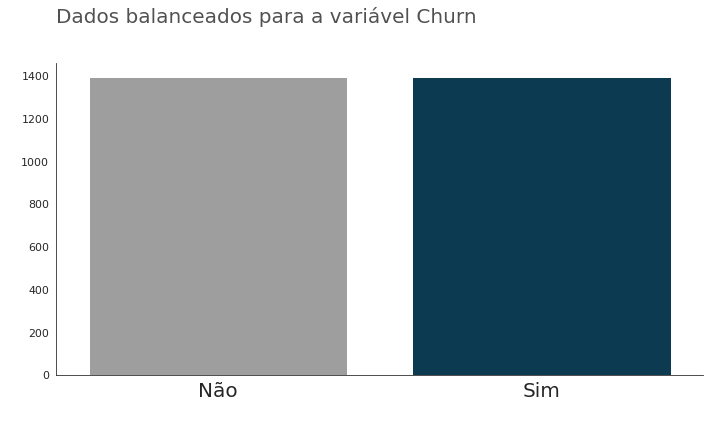

In [ ]:
# plotar gráfico de barras para as Classes
fig, ax = plt.subplots(figsize=(10, 6), dpi = 72)

# plotar a nova distribuição da variável Churn
sns.countplot(y_train_rus)

# Configurações dos gráficos
# ax.set_frame_on(False)
ax.set_title('Dados balanceados para a variável Churn', loc='left', pad=40, fontdict={'fontsize':20}, color='#515151');

# Limite do eixo y
plt.ylim()

# ax.get_yaxis().set_visible(False)
ax.set_xlabel(' ')
ax.set_ylabel(' ')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Colocando as legendas
plt.xticks([0, 1], ['Não', 'Sim'], fontsize = 20)

# mostrar grafico e subplots
plt.tight_layout();

### 4.9 Aplicando o cross-validation cruzada em alguns modelos

Aplicando a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* XGBClassifier
* LightGBM

In [ ]:
# instanciar=ndo os modelos

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# avaliar o desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.754676
DecisionTreeClassifier,0.700719
SGDClassifier,0.777698
SVC,0.795683
LogisticRegression,0.793525
XGBClassifier,0.804317
LGBMClassifier,0.761151


### 4.10 Otimização dos hiperparâmetros com Grid Search

O XGBoost tem muitos parâmetros. Alguns têm mais impacto na qualidade do modelo, outros menos. Uma boa prática é definir a taxa de aprendizado e o número de estimadores, ajustar outros parâmetros e, finalmente, verificar outras taxas de aprendizado.

Abaixo, ajustando o número de estimadores. O modelo é instanciado com "learning_rate=0.1".

In [ ]:
xgb = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.8071942446043165 para {'n_estimators': 50}


Para o número de estimadores igual a 50, faremos a busca pelos parâmtros max_depth e min_child_weight.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.8086330935251798 para {'max_depth': 1, 'min_child_weight': 1}


Obtidos os valores de max_depth=1 e min_child_weight=1, será otimizado o parâmetro gamma.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print(f"Melhor: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.8122302158273381 para {'gamma': 0.0}


Finalizando, obtido gamma=0, será realizado quatro testes para a learning_rate e ver qual destes testes oferece o melhor resultado.

In [ ]:
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print(f"Desempenho: {grid_result.best_score_} para {grid_result.best_params_}")

Melhor: 0.8812949640287769 para {'learning_rate': 0.001}


FaFato é que uma taxa de aprendizado menor, conseguiu melhorar o desempenho do modelo XGBoost, considerando recall como métrica. 

Agora, treina-se o modelo em cima do dataset de treino completo, e verifica-se o desempenho final em cima dos dados de teste, no seu primeiro contato com esse sub-conjunto que havia sido preservado.

### 4.11 Verificando o desempenho do modelo

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1282
           1       0.44      0.90      0.59       479

    accuracy                           0.66      1761
   macro avg       0.69      0.73      0.65      1761
weighted avg       0.80      0.66      0.68      1761

AUC: 0.7336



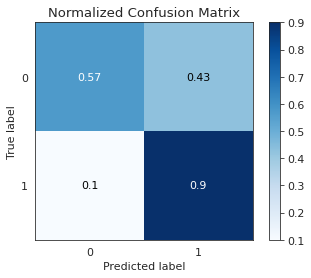

In [153]:
# modelo final
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(X_train_rus, y_train_rus)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

##5. Considerações finais 

O modelo proposto teve um ótimo desempenho nos testes, isso se da pelo fato dos dados estarem tratados, principalmente a variável churn que passou pelo processo de balanceamento para evitar um viés do modelo.

Foi utilizado a utiliação dos hiperparâmetros com o intuito de propor uma melhora no modelo, qualquer porcentagem de melhora no modelo pode gerar uma quantidade significativa de lucro para a empresa.

Empresas que fazem a análise de Churn tem grandes chances de conseguir diminuir a evasão de seus clientes, pois, é muito mais vantajoso e barato para a empresa segurar os seus clientes do que sair em busca de novos.